In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 


### Problem Statement :-To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
#Rows and Columns:-
print('Rows:-',df.shape[0],'Columns:-',df.shape[1])

Rows:- 614 Columns:- 13


In [13]:
# Info:-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
# checking the unique value that show the categorical and continous feature columns 
for d in df.columns[1:]:
    print('The unique values of',d,df[d].unique(),'\n')

The unique values of Gender ['Male' 'Female' nan] 

The unique values of Married ['No' 'Yes' nan] 

The unique values of Dependents ['0' '1' '2' '3+' nan] 

The unique values of Education ['Graduate' 'Not Graduate'] 

The unique values of Self_Employed ['No' 'Yes' nan] 

The unique values of ApplicantIncome [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 105

There are null values in datasets

In [14]:
# Checking null values
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 7 columns has null Values we need to clean it 

In [15]:
# Columns has null values we clean it by using mode method.
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [25]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [26]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [28]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
# using median method for continous feature:-
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [32]:
 df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
df['Dependents'].unique()
df['Dependents'].replace('3+','3',inplace=True)

In [35]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [37]:
df['Dependents']=df['Dependents'].astype('int')# change the datatype of columns.

# EDA

There are two types of feature columns 1. Categorical and 2.continous
 - we see all feature here

<AxesSubplot:xlabel='Gender', ylabel='count'>

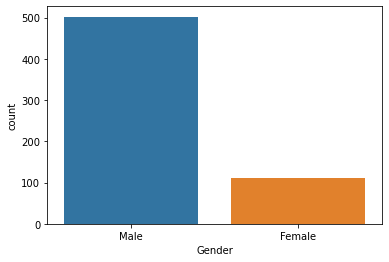

In [42]:
import warnings
warnings.filterwarnings('ignore')          
sb.countplot(df['Gender'])

In [ ]:
Gender:- male has higher propotion than female 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

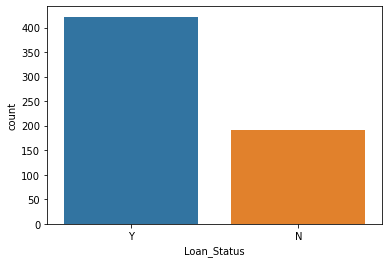

In [43]:
sb.countplot(df['Loan_Status']) 

- Here we see that target variable is imbalance, as the we see from graph yes is higher than no 

for more we see values counts

In [45]:
df['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [51]:
df['Loan_Status'].value_counts(normalize=True)*100


Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

We have to balance the data, we do it further

<AxesSubplot:xlabel='Dependents', ylabel='count'>

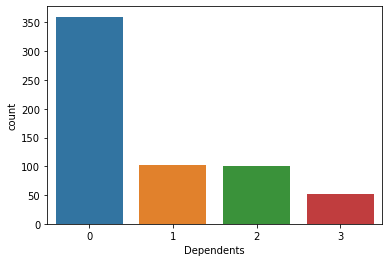

In [52]:
sb.countplot(df['Dependents'])

# 0 dependents has higher propotion, let me check some thing 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

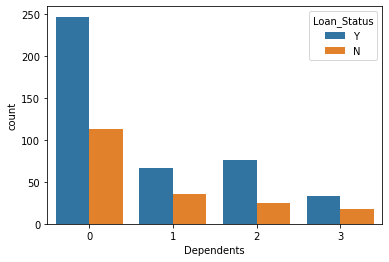

In [53]:
sb.countplot(df['Dependents'],hue=df['Loan_Status'])

ok, it is sfe to say that 0 dependents has highest loan status
- we can say that if the individual has no people depend or 0 people depend on that individual has Positive loan status 

<AxesSubplot:xlabel='Married', ylabel='count'>

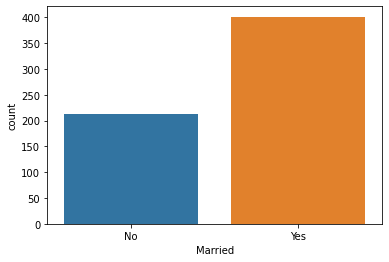

In [54]:
sb.countplot(df['Married'])

<AxesSubplot:xlabel='Married', ylabel='count'>

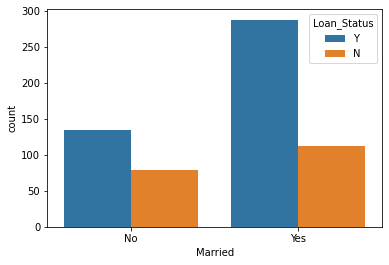

In [57]:
sb.countplot(df['Married'],hue=df['Loan_Status'])

Again, Married people has highest loan_status

<AxesSubplot:xlabel='Education', ylabel='count'>

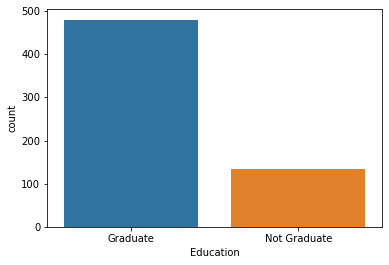

In [58]:
sb.countplot(df['Education'])

<AxesSubplot:xlabel='Education', ylabel='count'>

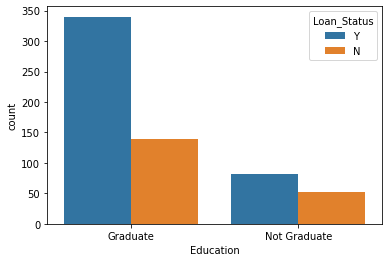

In [59]:
sb.countplot(df['Education'],hue=df['Loan_Status'])

Yes, people who are graduate has good loan _status, graduate people take loan more frequently than non graduate

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

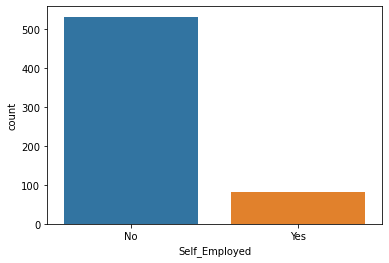

In [61]:
sb.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

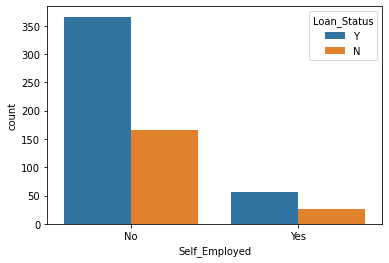

In [62]:
sb.countplot(df['Self_Employed'],hue=df['Loan_Status'])

- AS we see there are low propotion of people is self employed,high no. of people is no self employed.
- And the Loan status we see in both cases almost half of them do not have loan status and more than double of then has Loan status   

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

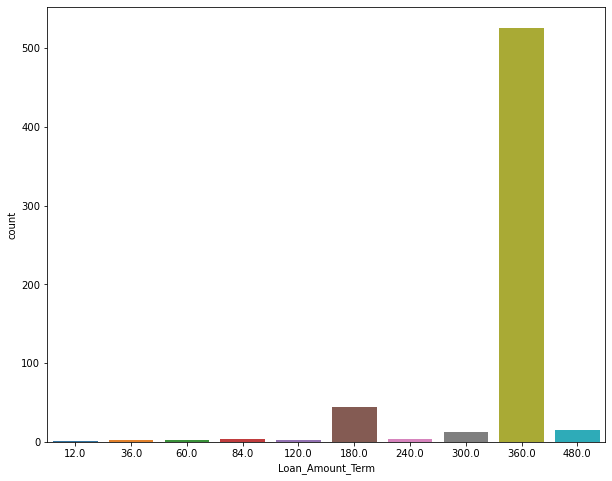

In [66]:
plt.figure(figsize=(10,8))
sb.countplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

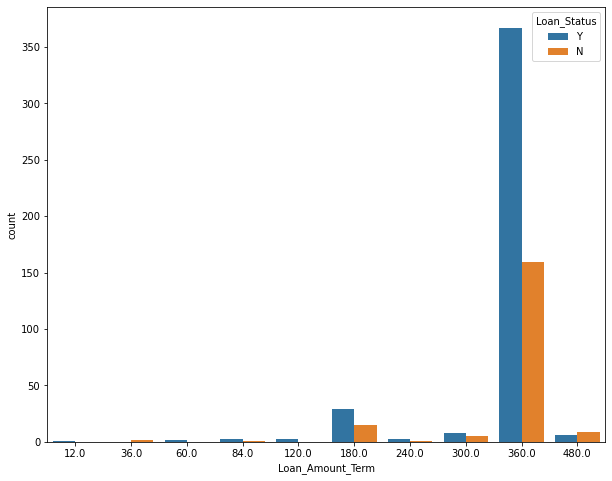

In [68]:
plt.figure(figsize=(10,8))
sb.countplot(df['Loan_Amount_Term'],hue=df['Loan_Status'])

 - here, most of loan is tanken for 30 years,and yes it is approved 
 - loan asked for 15 years has also granted, but not frequent as for 30 years , but it is second Highest of all Loan Term present right now 

# Loan amount and Loan term

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

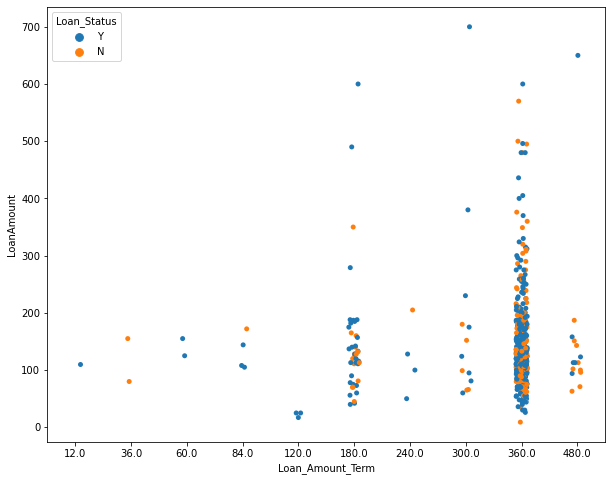

In [90]:
plt.figure(figsize=(10,8))
sb.stripplot(x=df['Loan_Amount_Term'],y=df['LoanAmount'],data=df,hue=df['Loan_Status'])

- loan amount has highest which is approved in loan term of 300, which is 25 years and amount is 700
- also, 40 years of loan term also has good loan amount which is between 600 to 700, which may at 660,approved dots are less but as there is larger amount it is approved 
- although, 30 years of loan term has loan amount 600, most of approved and not approved dots are seen in 30 years of loan term
- 15 years of term has also lots of dots, approved dots are good in numbers, as the higher the amount it approved.

# Loan tem and coapplicant income 

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

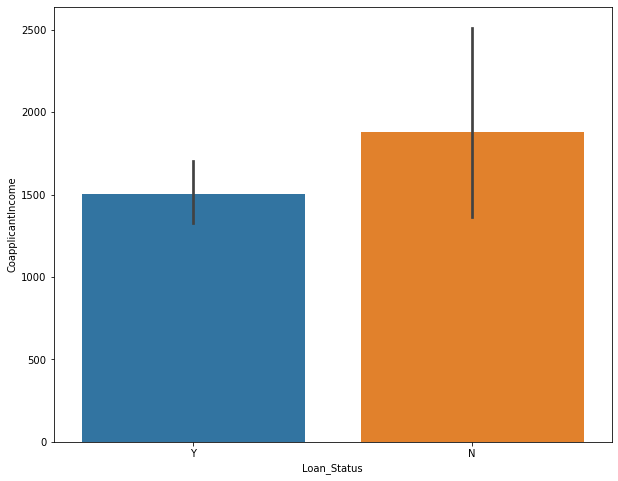

In [98]:
plt.figure(figsize=(10,8))

sb.barplot(x=df['Loan_Status'],y=df['CoapplicantIncome'],data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

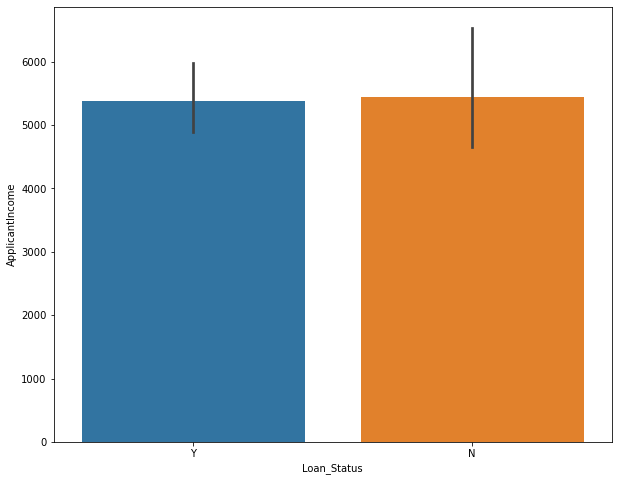

In [100]:
plt.figure(figsize=(10,8))
sb.barplot(x=df['Loan_Status'],y=df['ApplicantIncome'],data=df)

# Credit history and Loan status

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

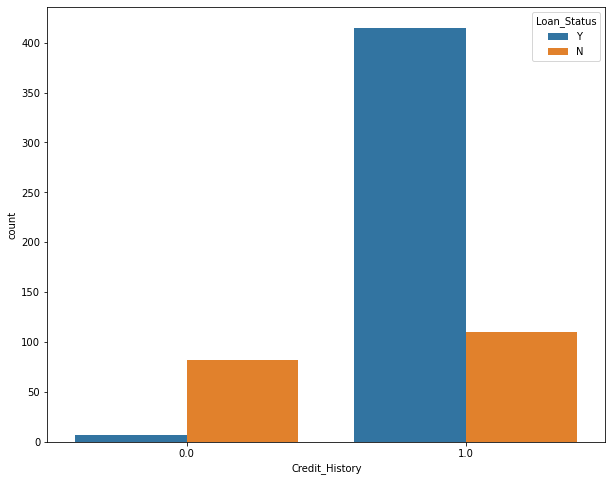

In [102]:
plt.figure(figsize=(10,8))
sb.countplot(df['Credit_History'],hue=df['Loan_Status'])

If credit history is existed there may have chance you get approved the loan

# property Area and Loan status 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

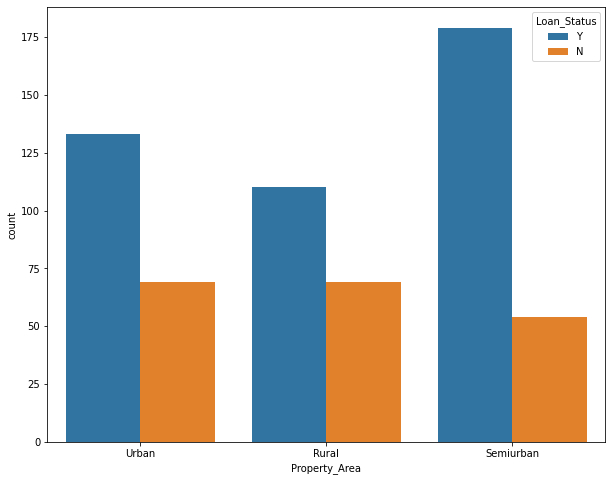

In [105]:
plt.figure(figsize=(10,8))
sb.countplot(df['Property_Area'],hue=df['Loan_Status'])

- All, three urban, rural and semiurban, get approved for loan.But, through analysis we see that semiurban has highest no aproved loan status.
- urban has also approved loan status more than rural 
- and then at last come to rural
 
  so for approved loan status it may look like semiurban>>urban>>Rural
 
  In case of not approved we see urban == rural>>semiurban

# Credit history,LoanAmount and LoanStatus

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

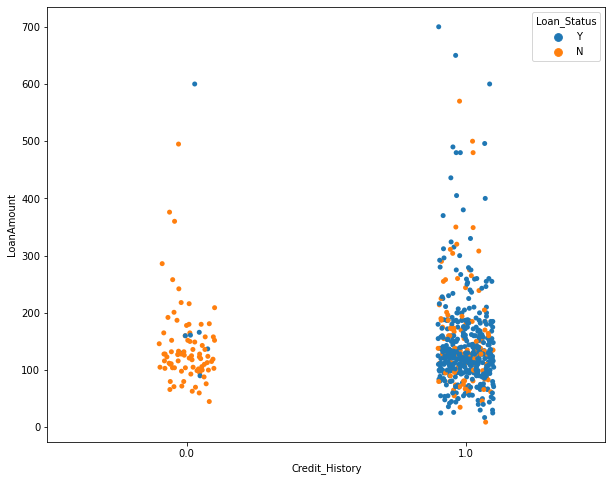

In [112]:
plt.figure(figsize=(10,8))
sb.stripplot(x='Credit_History',y='LoanAmount',data=df,hue='Loan_Status')

  I am observing here :-

    - some of dots shows higher loan Amount as they have the credit history or not 
    - most of dots are seen in the are where having the credit history 
    - And most of approved loan status we in area having the credit history 

# Property area , loan Status and Loan Amount 

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

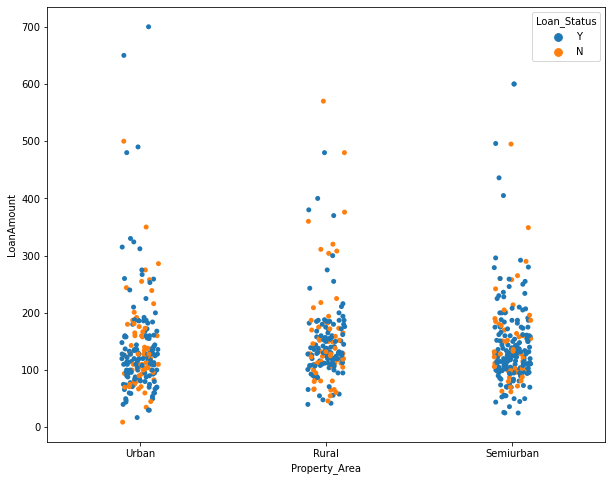

In [115]:
plt.figure(figsize=(10,8))
sb.stripplot(x=df['Property_Area'],y=df['LoanAmount'],data=df,hue=df['Loan_Status'])

Now, in the figure we see:-
    
    - Urban has highest loan amount around 700, and approved loan status 
    - Highest loan amount of rural is around 580 and not approved Loan status
    - Semiurban has heighest loan amount around 600 and approved laon status 
    - Semiurban has larger density of loan.



In [116]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Loan status, Loan ammount ,Applicant  income and credit history

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

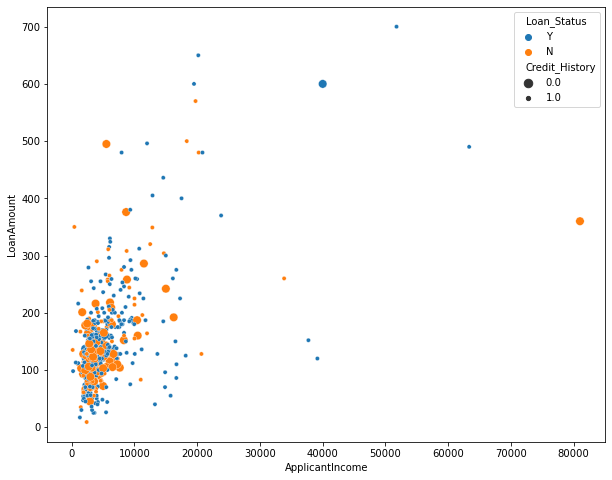

In [120]:
plt.figure(figsize=(10,8))
sb.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',size='Credit_History',data=df)

# Loan status, Loan ammount ,Coapplicant income and credit history

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

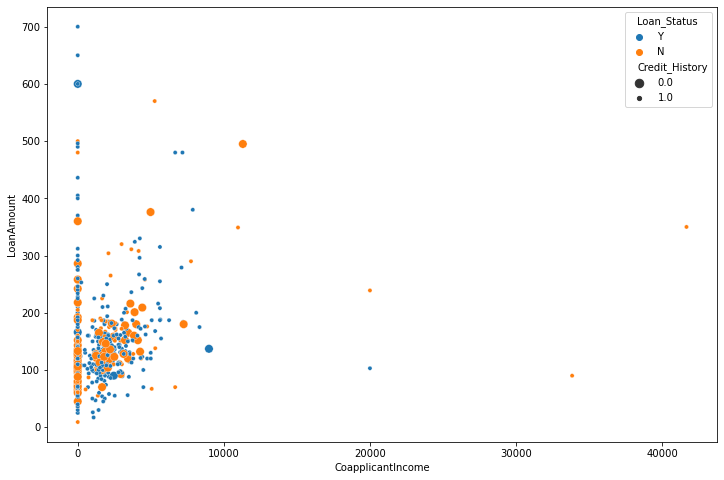

In [122]:
plt.figure(figsize=(12,8))
sb.scatterplot(x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status',size='Credit_History',data=df)

# Loan status, Loan ammount ,Applicant income and Property area

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

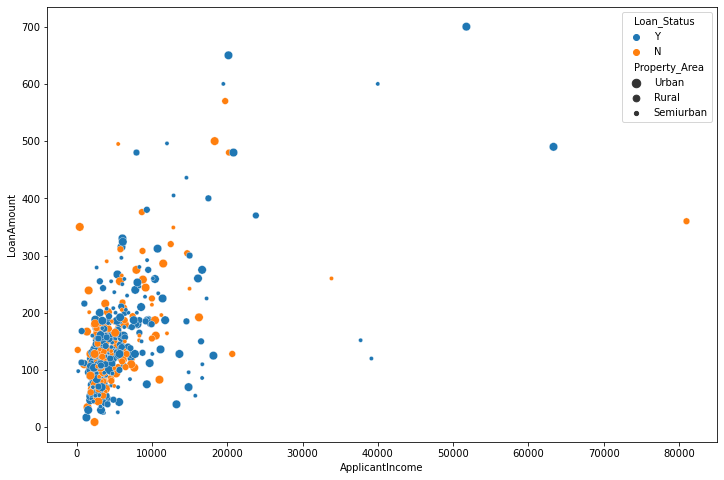

In [125]:
plt.figure(figsize=(12,8))
sb.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',size='Property_Area',data=df)

# Loan status, Loan ammount ,Coapplicant income and Property area

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

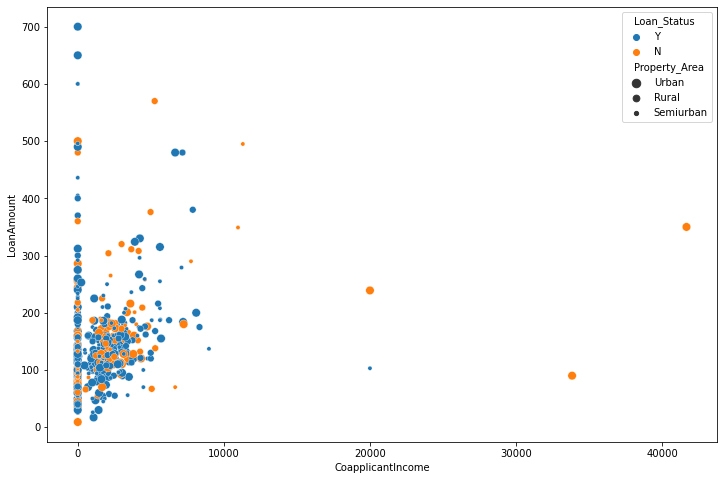

In [126]:
plt.figure(figsize=(12,8))
sb.scatterplot(x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status',size='Property_Area',data=df)

In [134]:
df.columns 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [135]:
# these columns are the continous in nature 
continous_col=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

# Checking skewness

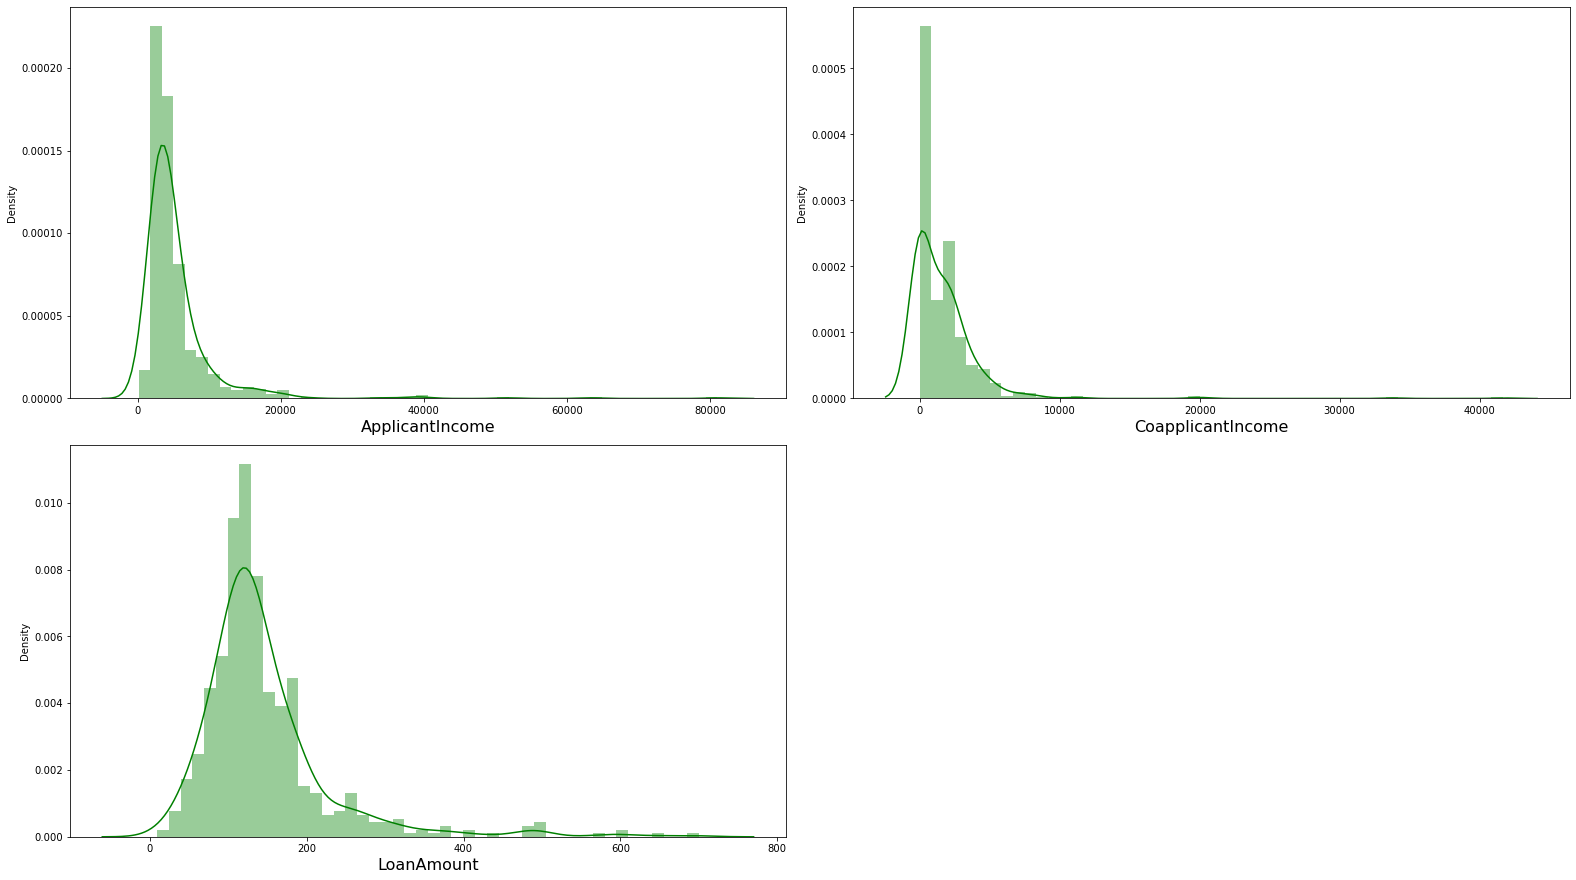

In [136]:
plt.figure(figsize=(22,24))
num=1

for columns in continous_col:
    
    if num<=8:
        ax=plt.subplot(4,2,num)
        sb.distplot(continous_col[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

In [140]:
df.skew() # skewed data 

Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

All three columns are positively skewed

# Checking Outliers 

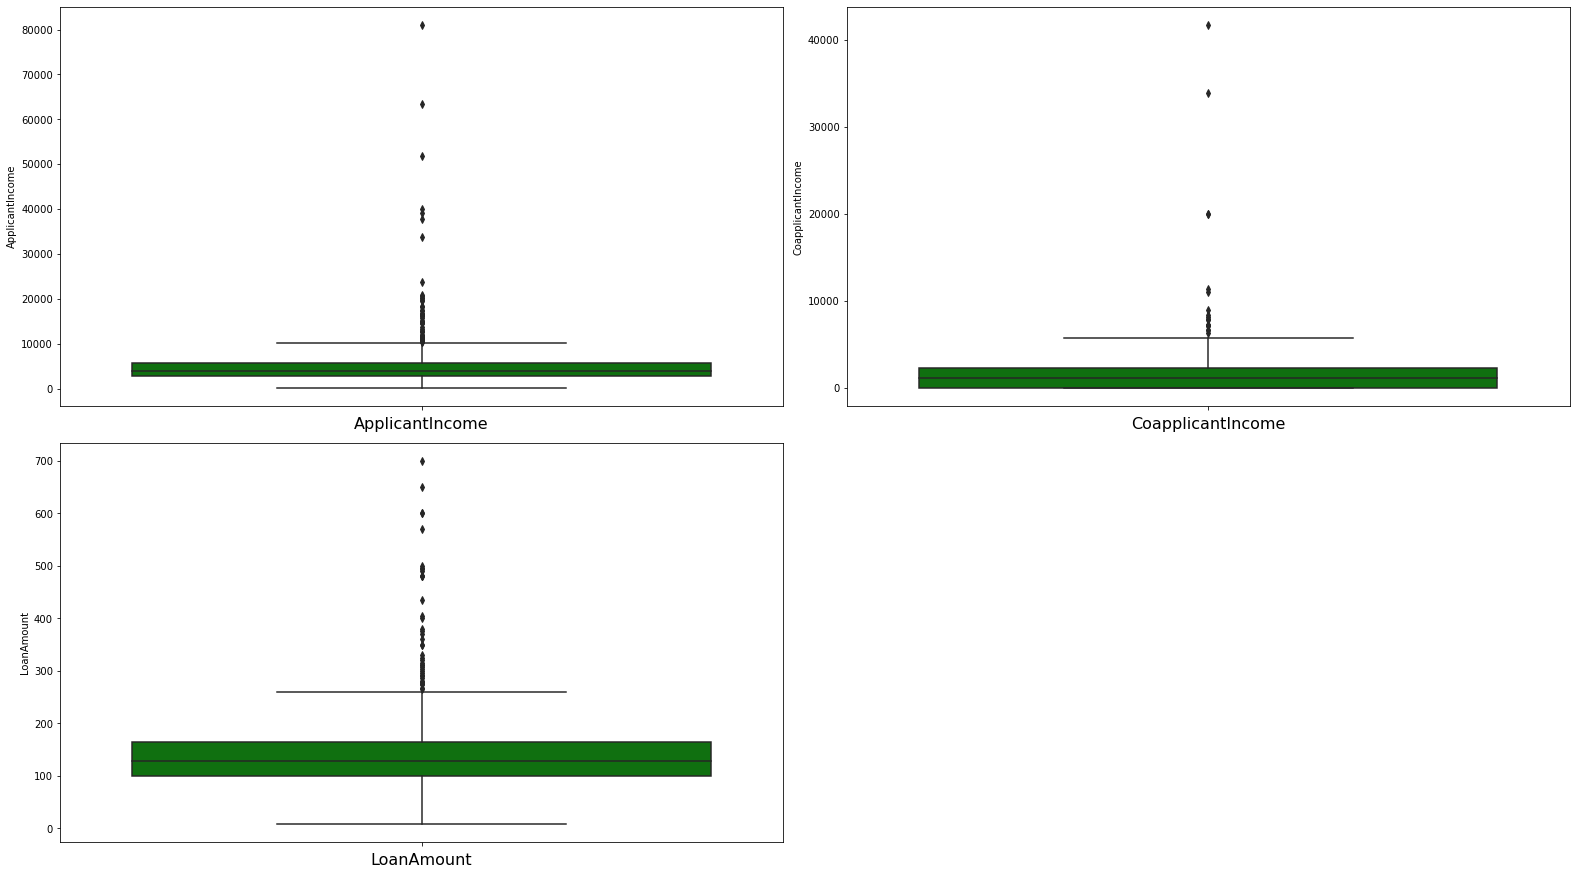

In [139]:
plt.figure(figsize=(22,24))
num=1

for columns in continous_col:
    
    if num<=8:
        ax=plt.subplot(4,2,num)
        sb.boxplot(y=continous_col[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

there are lots of outliers, we will try to remove it.

# Checking correlation

In [141]:
df.corr() # this correlation only show the numeric columns not object columns 

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163103,-0.103864,-0.040160
ApplicantIncome,0.118202,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,0.030430,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.163103,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.040160,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<AxesSubplot:>

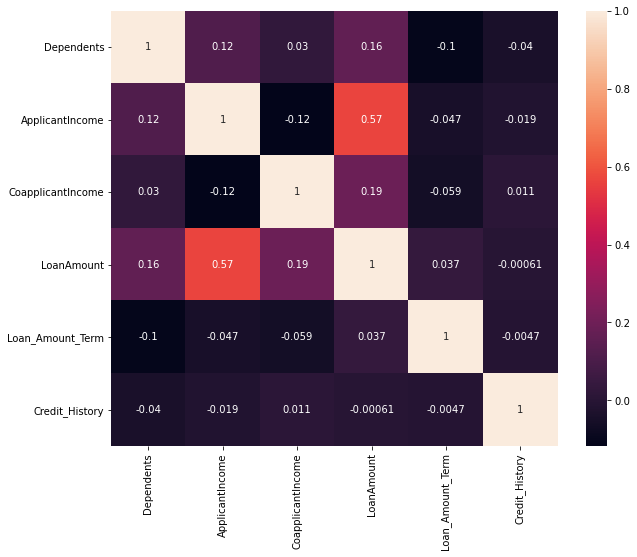

In [143]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(),annot=True)

# Feature engineering 

we change object columns into numeric for model prediction, as we see there are categorical columns.
- 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
  'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
  'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
    
   - categorical columns:- Gender', 'Married', 'Dependents','Education','Self_Employed','Credit_History',
        'Property_Area','Loan_Status'
   - Continous columns:-'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'

In [147]:
from sklearn.preprocessing import LabelEncoder

In [149]:
le=LabelEncoder()

In [150]:
df['Gender']=le.fit_transform(df['Gender'])

In [153]:
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Credit_History']=le.fit_transform(df['Credit_History'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])


In [155]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(3), int32(7), int64(2), object(1)
memory usage: 45.7+ KB


# Checking correlation

In [157]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

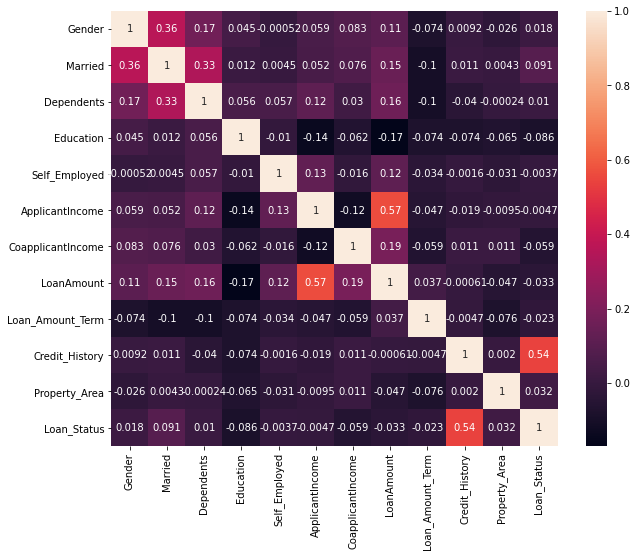

In [159]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(),annot=True)

As we see here there are not any of multicollinerity problem,
- Credit history  has strong relationship with target variable is 0.54
- and loan amount and applicant income has 0.57 % of correlation 

In [162]:
df.drop('Loan_ID',axis=1,inplace=True)

In [172]:
np.log(continous_col) # just showing how this shows infinte values, this values cannot use for prediction 

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,8.674026,-inf,4.852030
1,8.430109,7.318540,4.852030
2,8.006368,-inf,4.189655
3,7.856707,7.765569,4.787492
4,8.699515,-inf,4.948760
...,...,...,...
609,7.972466,-inf,4.262680
610,8.320205,-inf,3.688879
611,8.996157,5.480639,5.533389
612,8.933664,-inf,5.231109


In [178]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
f=pt.fit_transform(continous_col)
f=pd.DataFrame(f)

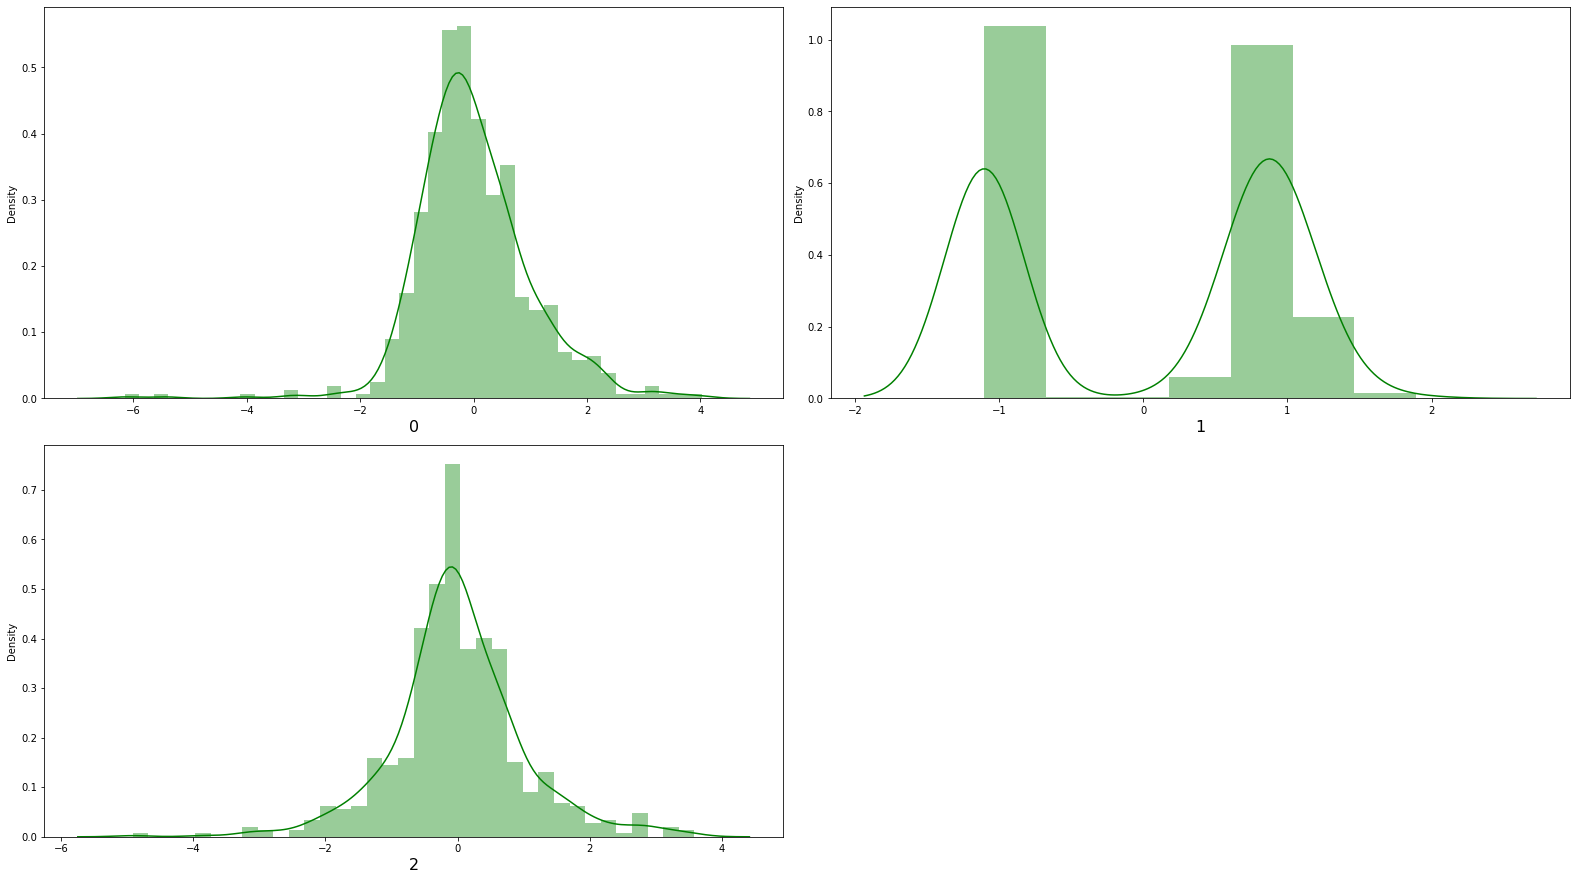

In [179]:
plt.figure(figsize=(22,24))
num=1

for columns in f:
    
    if num<=8:
        ax=plt.subplot(4,2,num)
        sb.distplot(f[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

,0,1,2
0,0.544331,-1.102837,-0.025462
1,0.170974,0.750578,-0.025462
2,-0.499955,-1.102837,-1.339826
3,-0.743873,0.891686,-0.155876
4,0.582817,-1.102837,0.170931
...,...,...,...
609,-0.554885,-1.102837,-1.197589
610,-0.000290,-1.102837,-2.296436
611,1.023487,0.208603,1.381387
612,0.931750,-1.102837,0.750522


In [165]:
from scipy.stats import zscore

In [207]:
z=np.abs(zscore(continous_col))

np.where(z>3)


(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
        333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
        581, 600, 604], dtype=int64),
 array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2,
        2, 2, 2, 2, 1, 1, 2], dtype=int64))

In [208]:
len(np.where(z>3)[0])
df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [215]:
df1.drop(columns=['level_0','index'],axis=1,inplace=True)

In [216]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
584,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
585,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
586,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
587,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [224]:
continous_newcol=df1[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [217]:
from sklearn.preprocessing import power_transform

In [240]:
pt=PowerTransformer()
new_df=pt.fit_transform(continous_newcol)

In [241]:
new_df=pd.DataFrame(new_df)
new_df.columns=[['ApplicantIncome_1','CoapplicantIncome_1','LoanAmount_1']]

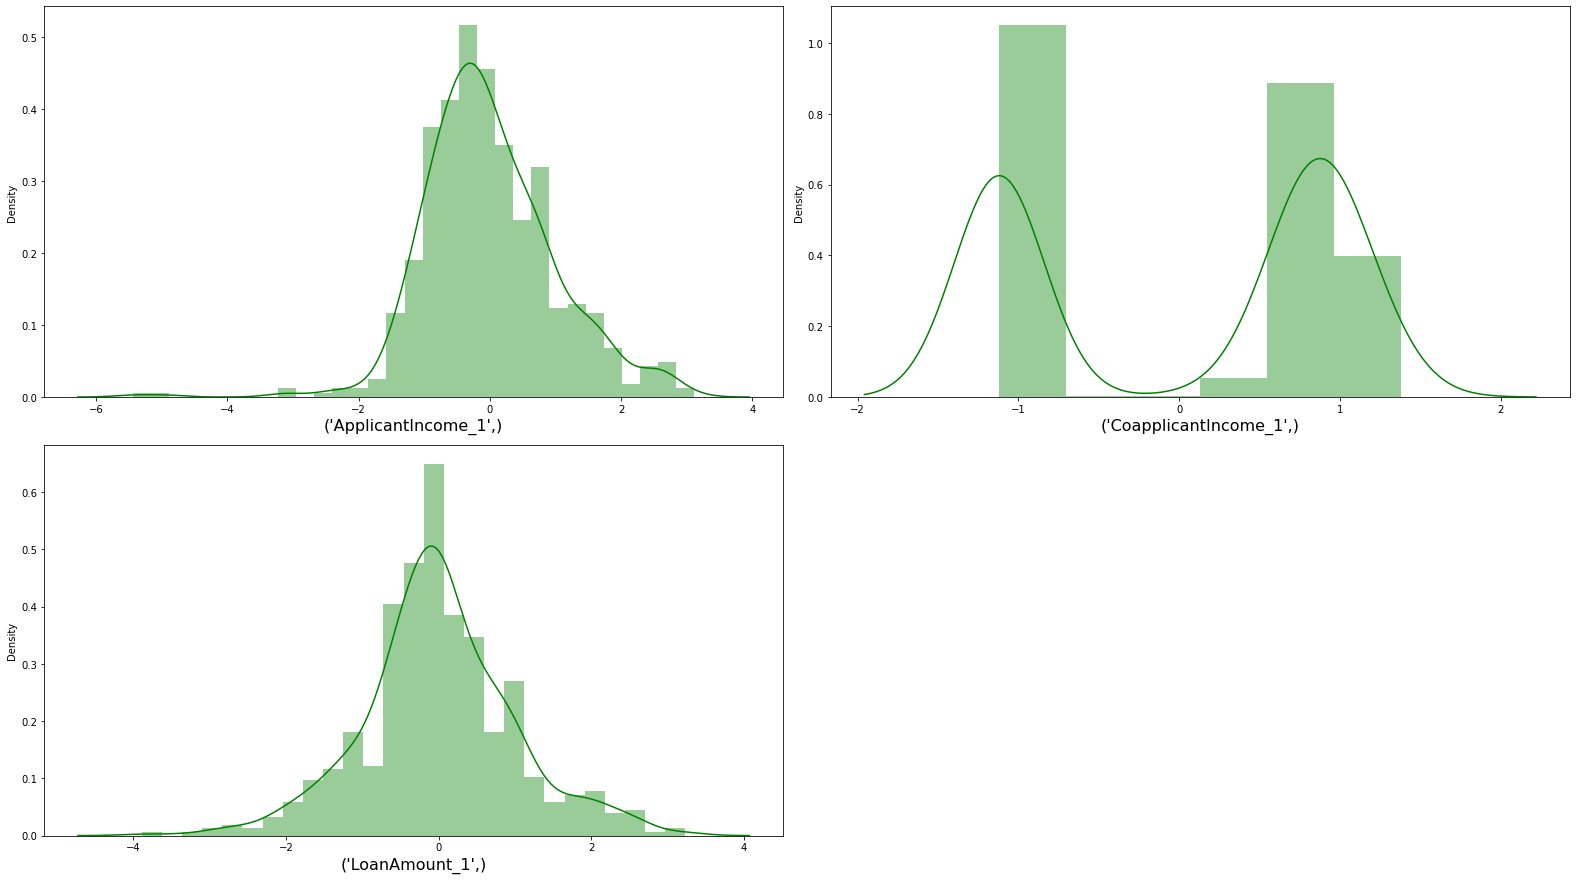

In [242]:
plt.figure(figsize=(22,24))
num=1

for columns in new_df:
    
    if num<=8:
        ax=plt.subplot(4,2,num)
        sb.distplot(new_df[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

Now we see that skewness is less.There are lots of skewness still but if i remove them we have to losse some more data and we have limited no. of data

In [243]:
ddf=pd.concat([new_df,df1],axis=1,join='inner')

In [244]:
ddf

,"(ApplicantIncome_1,)","(CoapplicantIncome_1,)","(LoanAmount_1,)",Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.688986,-1.119438,0.003682,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,0.239843,0.748807,0.003682,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,-0.525799,-1.119438,-1.384802,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,-0.791841,0.899419,-0.148052,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,0.736280,-1.119438,0.238407,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,-0.586262,-1.119438,-1.248901,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
585,0.039489,-1.119438,-2.217613,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
586,1.291744,0.180599,1.862538,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
587,1.173950,-1.119438,0.976618,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [245]:
ddf.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1,inplace=True)

In [246]:
ddf

,"(ApplicantIncome_1,)","(CoapplicantIncome_1,)","(LoanAmount_1,)",Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.688986,-1.119438,0.003682,1,0,0,0,0,360.0,1,2,1
1,0.239843,0.748807,0.003682,1,1,1,0,0,360.0,1,0,0
2,-0.525799,-1.119438,-1.384802,1,1,0,0,1,360.0,1,2,1
3,-0.791841,0.899419,-0.148052,1,1,0,1,0,360.0,1,2,1
4,0.736280,-1.119438,0.238407,1,0,0,0,0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
584,-0.586262,-1.119438,-1.248901,0,0,0,0,0,360.0,1,0,1
585,0.039489,-1.119438,-2.217613,1,1,3,0,0,180.0,1,0,1
586,1.291744,0.180599,1.862538,1,1,1,0,0,360.0,1,2,1
587,1.173950,-1.119438,0.976618,1,1,2,0,0,360.0,1,2,1


# Checking VIF

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [249]:
vif_data = pd.DataFrame()
vif_data["feature"] = ddf.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(ddf.values, i)
                          for i in range(len(ddf.columns))]
vif_data.sort_values(by='VIF',ascending=False)


,feature,VIF
9,Credit_History,9.147797
8,Loan_Amount_Term,9.064723
3,Gender,6.001483
11,Loan_Status,4.819868
4,Married,3.967421
10,Property_Area,2.633470
5,Dependents,1.793680
0,"(ApplicantIncome_1,)",1.767139
1,"(CoapplicantIncome_1,)",1.602638
2,"(LoanAmount_1,)",1.568089


# Feature Selection:-

## splitting the feature and target

In [251]:
x=ddf.drop('Loan_Status',axis=1)
y=ddf['Loan_Status']

In [255]:
from sklearn.tree import DecisionTreeClassifier
select= DecisionTreeClassifier()
select.fit(x,y)

DecisionTreeClassifier()

In [256]:
add=select.feature_importances_
add

array([0.23015726, 0.07040705, 0.17688404, 0.02811426, 0.02263133,
       0.0437044 , 0.01307788, 0.01768774, 0.06701418, 0.30903385,
       0.02128802])

In [257]:
for index,feature_imp in enumerate(select.feature_importances_):
    print(index , feature_imp)

0 0.23015726162635788
1 0.07040704943652693
2 0.1768840351987597
3 0.028114260257117392
4 0.02263133422052679
5 0.043704397275825826
6 0.013077878402553731
7 0.01768773623169227
8 0.06701418325146201
9 0.3090338478937122
10 0.021288016205465256


In [258]:
imp_feature=pd.DataFrame()
imp_feature['Feature']= x.columns
imp_feature['Values']=select.feature_importances_

In [259]:
imp_feature.sort_values('Values',ascending=False)

,Feature,Values
9,Credit_History,0.309034
0,"(ApplicantIncome_1,)",0.230157
2,"(LoanAmount_1,)",0.176884
1,"(CoapplicantIncome_1,)",0.070407
8,Loan_Amount_Term,0.067014
5,Dependents,0.043704
3,Gender,0.028114
4,Married,0.022631
10,Property_Area,0.021288
7,Self_Employed,0.017688


In [260]:
0.23015726+ 0.07040705+ 0.17688404+ 0.02811426+ 0.02263133+0.0437044 + 0.01307788+ 0.01768774+ 0.06701418+ 0.30903385+0.02128802

1.00000001

- so, we may drop one columns which is very close to 0.
- but, i am not dropping any columns, selecting all the columns 

# Scaling Data:-

In [261]:
from sklearn.preprocessing import StandardScaler

In [263]:
scale= StandardScaler()
x_scaled=scale.fit_transform(ddf)

In [264]:
x_scaled

array([[ 0.68898634, -1.11943846,  0.00368194, ...,  0.41349021,
         1.22292864,  0.66871103],
       [ 0.23984329,  0.74880747,  0.00368194, ...,  0.41349021,
        -1.31335646, -1.49541424],
       [-0.52579862, -1.11943846, -1.38480227, ...,  0.41349021,
         1.22292864,  0.66871103],
       ...,
       [ 1.29174432,  0.18059936,  1.86253783, ...,  0.41349021,
         1.22292864,  0.66871103],
       [ 1.17394957, -1.11943846,  0.97661836, ...,  0.41349021,
         1.22292864,  0.66871103],
       [ 0.23984329, -1.11943846,  0.09560474, ..., -2.41843694,
        -0.04521391, -1.49541424]])

# Balancing Dataset:-

In [266]:
from imblearn.over_sampling import SMOTE

In [267]:
sm=SMOTE()

In [272]:
y.value_counts(normalize=True)*100

1    69.10017
0    30.89983
Name: Loan_Status, dtype: float64

In [279]:
y.value_counts()

1    407
0    182
Name: Loan_Status, dtype: int64

In [274]:
n_x,n_y=sm.fit_resample(x_scaled,y)

In [278]:
n_y.value_counts()

0    407
1    407
Name: Loan_Status, dtype: int64

## so, here we see that Data is balanced 

# Training and Model Building

### Find best random_state

In [284]:
from sklearn.model_selection import train_test_split

In [282]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

In [285]:
from sklearn.linear_model import LogisticRegression

In [286]:
max_accu=0
max_RS=0

for i in range(0,400):
    x_train,x_test,y_train,y_test= train_test_split(n_x,n_y,random_state=i,test_size=.20)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accu:
        max_accu=acc
        max_RS=i
print("Best accuracy is ",max_accu,"on Random State =",max_RS)

Best accuracy is  1.0 on Random State = 0


### Spliting the train and test data

In [288]:
 x_train,x_test,y_train,y_test= train_test_split(n_x,n_y,random_state=0,test_size=.20)

# Model Building

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier

In [290]:
lr_model=LogisticRegression()
dt_model=DecisionTreeClassifier()
svc_model=SVC()
knn_model=KNeighborsClassifier()
rd_model=RandomForestClassifier()
xgb_model=XGBClassifier()
sdg_model=SGDClassifier()
bag_model=BaggingClassifier()
ada_model=AdaBoostClassifier()
gd_model=GradientBoostingClassifier()
et_model=ExtraTreeClassifier()

In [291]:
models=[lr_model,dt_model,svc_model,knn_model,rd_model,xgb_model,sdg_model,bag_model,ada_model,gd_model,et_model]

In [320]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of ',m, 'is', accuracy_score(y_test,predict))
    print("F1 Score", f1_score(y_test,predict))
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,predict))
    print('Classification_report',classification_report(y_test,predict))
    print('*******************************************')

Accuracy Score of  LogisticRegression() is 1.0
F1 Score 1.0
Confusion Matrix of  LogisticRegression()  is 
 [[80  0]
 [ 0 83]]
Classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        83

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163

*******************************************
Accuracy Score of  DecisionTreeClassifier() is 1.0
F1 Score 1.0
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[80  0]
 [ 0 83]]
Classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        83

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       1

In [294]:
from sklearn.model_selection import cross_val_score

In [309]:
for i in models:
    print('\n','Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test)))
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,n_x,n_y,cv=8, scoring='accuracy').mean())
    print('@'*50)


 Accuracy_Score of  LogisticRegression() is 1.0
cross Validation accuracy score of  LogisticRegression()  is  1.0
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 Accuracy_Score of  DecisionTreeClassifier() is 1.0
cross Validation accuracy score of  DecisionTreeClassifier()  is  1.0
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 Accuracy_Score of  SVC() is 1.0
cross Validation accuracy score of  SVC()  is  0.9987745098039216
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 Accuracy_Score of  KNeighborsClassifier() is 0.9877300613496932
cross Validation accuracy score of  KNeighborsClassifier()  is  0.9852819840807611
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 Accuracy_Score of  RandomForestClassifier() is 1.0
cross Validation accuracy score of  RandomForestClassifier()  is  1.0
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 Accuracy_Score of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynod

# HyperParameter Tuning

We dont need any hyperparameter tuning as we see it already showing its best accuracy, and not only one or two model most of model is showing its best accuray_score and also after cross validation score its shows model is not overfitted so, we can save the models.

# Plot_roc_curve

In [367]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve


In [368]:
for m in models:
    m.fit(x_train,y_train)

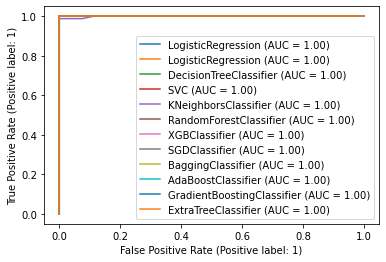

In [371]:
dist=plot_roc_curve(lr_model,x_test,y_test)
plot_roc_curve(lr_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(dt_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(svc_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(knn_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(rd_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(xgb_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(sdg_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(bag_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(ada_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(gd_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(et_model,x_test,y_test,ax=dist.ax_) ;


## Here, we see all the model overlapped each other, and all the model has Auc=1

### so, we save any of the models, they are showing almost 100% accuracy

# Saving the model

In [374]:
import pickle
file_name='Loan_status_prediction'
with open(file_name,'wb') as file:
    pickle.dump(rd_model,file)

# I am saving Random Forest model 